# Einseitenbandmodulation

## Informationssignal 

Das Informationssignal $u(t)$ sei ein Multisinussignal der Form

\begin{equation*}
    u(t) = \sum_{i=1}^n a_i \cdot \cos(\omega_i t + \varphi_i) \; .
\end{equation*}

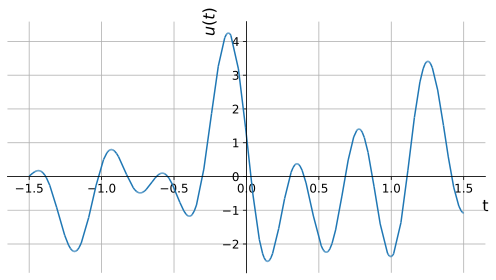

In [1]:
import numpy as np
from sympy import *
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=(7,4)
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['axes.grid']='True'
rcParams['axes.labelsize']='16'

t = var('t')
f = var('f')
index = np.linspace(0,4,5,dtype=np.int)

f_i = np.array([0.6, 1.0, 1.4, 2.0, 2.3])
a_i = np.array([1.0, 0.5, 1.2, -0.8, 1.3])
phi_i = np.array([1.0, 0.5, 1.2, -0.8, 1.3])

u = 0
for run in index:
    u = u + a_i[run] * cos(2*pi*f_i[run]*t+phi_i[run])
 
plot(u, (t, -1.5, 1.5), ylabel='$u(t)$',axis_center=(0,0))

Um ein Einseitenbandsignal zu erhalten, ist das reelle Signal $u(t)$ um einen Imaginärteil zu ergänzen, der die Hilbert-Transformierte von $u(t)$ entspricht. Aus den Korrespondenzen der Hilbert-Transformation geht hervor, dass

\begin{align}
   {\cal H} \big\{ \cos(\omega t) \big\} &= \sin(\omega t) \\
   {\cal H} \big\{ \sin(\omega t) \big\} &= - \cos(\omega t) 
\end{align}

gilt. Insofern lautet die Hilbert-Transformierte von $u(t)$

\begin{equation*}
    \breve{u}(t) = \sum_{i=1}^n a_i \cdot \sin(\omega_i t + \varphi_i)
\end{equation*}

und die komplexe Einhüllenden der beiden möglichen Einseitenbandsignale

\begin{align}
    u^+(t) &= u(t) + j \breve{u}(t) = \sum_{i=1}^n a_i \cdot \Big( \cos(\omega_i t + \varphi_i) - j \sin(\omega_i t + \varphi_i) \Big) \\
    u^-(t) &= u(t) - j \breve{u}(t) = \sum_{i=1}^n a_i \cdot \Big( \cos(\omega_i t + \varphi_i) + j \sin(\omega_i t + \varphi_i) \Big) \; .
\end{align}

Im unteren Bild ist der komplexe Verlauf des oberen Einseitenbandsignals über der Zeit $t$ dargestellt.

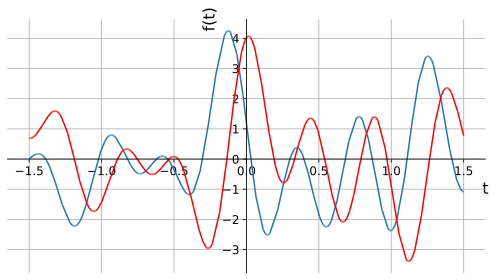

In [2]:
#import matplotlib as mpl
#from mpl_toolkits.mplot3d import Axes3D
from sympy.plotting import plot3d_parametric_line

# Berechnung der Hilbert-Transformierten des Multi-Sinus-Signals
uh = 0
for run in index:
    uh = uh + a_i[run] * sin(2*pi*f_i[run]*t+phi_i[run])

# Berechnung der komplexen Einhüllenden der ESB-Signale
uOSB = u + I*uh
uUSB = u - I*uh

#plot3d_parametric_line(re(uOSB), im(uOSB), t, (t, 0, 3),xlabel='Re{}',ylabel='Im{}',zlabel='t')

p1 = plot(re(uOSB), (t, -1.5, 1.5), axis_center=(0,0), show=False, label='Re')
p2 = plot(im(uOSB), (t, -1.5, 1.5), axis_center=(0,0), line_color="red",show=False, label='Im')
p1.extend(p2)
p1.show()


Das Spektrum $\breve{U}(j \omega)$ der Hilbert-Transformierten lautet

\begin{align}
    \breve{U}(j \omega) 
    &= \frac{\pi}{j} \cdot \sum_{i=1}^n a_i \cdot \left[ \delta(\omega - \omega_i) \cdot e^{j \varphi_i} - \delta(\omega + \omega_i) \cdot e^{- j \varphi_i} \right] \; .
\end{align}

Das Spektrum $U^{(OSB)}(j \omega)$ des oberen Einseitenbandsignals lautet

\begin{align}
    U^{(OSB)}(j \omega) 
    &= U(j \omega) + j \breve{U}(j \omega) 
     = 2 \pi \cdot \sum_{i=1}^n a_i \cdot \delta(\omega - \omega_i) \cdot e^{j \varphi_i} \; .
\end{align}

Entsprechend gilt für das Spektrum $U^{(USB)}(j \omega)$ des unteren Einseitenbandsignals

\begin{align}
    U^{(USB)}(j \omega) 
    &= U(j \omega) - j \breve{U}(j \omega) 
     = 2 \pi \cdot \sum_{i=1}^n a_i \cdot \delta(\omega + \omega_i) \cdot e^{-j \varphi_i} \; .
\end{align}



Die folgende Abbildung illustriert das Betragsspektrum $|U^{(OSB)}(j \omega)|$ für das obere und $|U^{(USB)}(j \omega)|$ für das untere Einseitenbandsignal. Dabei wird das Spektrum analytisch berechnet. Eine symbolische Berechnung mit sympy würde aufgrund er auftretenden Dirac-Impulse zu Problemen führen. Auch eine numerische Berechnung führt aufgrund von des Leck-Effektes der diskreten Fouriertransformation nicht zur exakten Lösung. Man erkennt im Spektrum die Paare von positiven und negativen Frequenzen $\pm f_i$ der Kosinus-Funktionen.

Die Bandbreite ergibt sich für dieses spezielle Signal aus der maximalen Frequenz der Kosinussignale zu $B/2 = f_\max = 2.3$ Hz. Positive Frequenzen repräsentieren das obere Seitenband, negative Frequenzen das untere Seitenband. Aufgrund der Bildung eines analytischen Signals wird nur ein Seitenband übertragen.

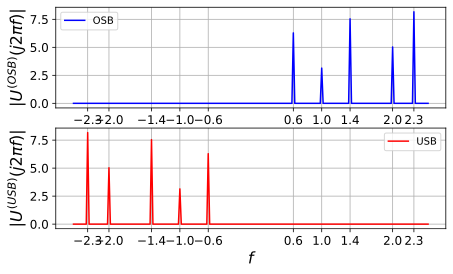

In [3]:
# Abbildung der Frequenzen auf ganzzahlige Werte
N_f = 50
f_int = np.around(f_i*N_f)
f_int = f_int.astype(int)

# Berechnung des Spektrums aus Dirac-Impulsen
# cardinality of x axis
f_max = np.amax(f_int)
N_x = f_max * 2 + 1

UOSB = 0
UUSB = 0
for run in index:
    fplus = f_int[run]+f_max
    UOSB = UOSB + a_i[run] * signal.unit_impulse(N_x,fplus)*exp(I*phi_i[run])
    fminus = f_max-f_int[run]
    UUSB = UUSB + a_i[run] * signal.unit_impulse(N_x,fminus)*exp(-I*phi_i[run])

# aus Korrespondenz der Fourier-Transformation: cos(wt) --> pi (delta(w-w_0)+delta(w+w_0))
UOSB = UOSB * 2* np.pi
UUSB = UUSB * 2* np.pi

N_margin = 10
UOSBplot = np.append(np.zeros((1,N_margin)), UOSB)
UOSBplot = np.append(UOSBplot, np.zeros((1,N_margin)))
UUSBplot = np.append(np.zeros((1,N_margin)), UUSB)
UUSBplot = np.append(UUSBplot, np.zeros((1,N_margin)))

fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(np.arange(-f_max-N_margin,f_max+N_margin+1)/N_f,abs(UOSBplot),'b-',label="OSB")
#plt.xlabel('$f$')
plt.ylabel('$|U^{(OSB)}(j 2 \pi f)|$')
plt.xticks(np.append(-f_i,f_i))
plt.grid(True)
plt.legend()

ax = fig.add_subplot(212)
ax.plot(np.arange(-f_max-N_margin,f_max+N_margin+1)/N_f,abs(UUSBplot),'r-',label="USB")
plt.xlabel('$f$')
plt.ylabel('$|U^{(USB)}(j 2 \pi f)|$')
plt.xticks(np.append(-f_i,f_i))
plt.grid(True)
plt.legend()


## Mischen

Die Einseitenbandsignale $u^{(OSB)}(t)$ und $u^{(USB)}(t)$ werden nun in das Übertragungsband zur Frequenz $f_0$ verschoben. Dies geschieht über

\begin{equation}
    x^{(ESB)}(t)
    = \mathrm{Re} \left\{ u^{(ESB)}(t) \cdot e^{j \omega_0 t} \right\} 
    = u(t) \cdot \cos(\omega_0 t) \mp \breve{u}(t) \cdot \sin(\omega_0 t) \; .
\end{equation}

Der unten illustrierte zeitliche Verlauf zeigt die Einhüllende (rot) und das dazwischen oszillierende modulierte Signal.

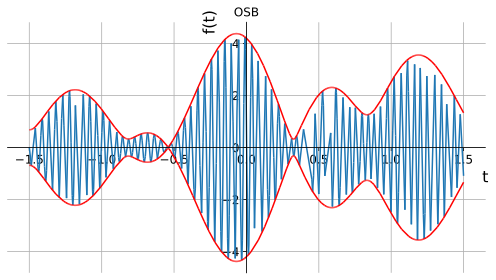

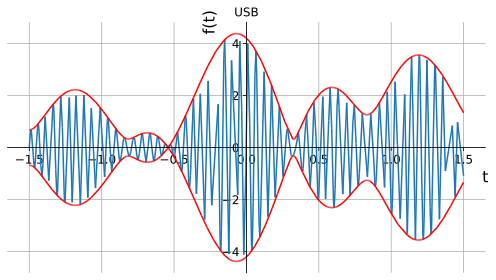

In [4]:
# Trägerfrequenz
f_0 = 20

# modulierte Einseitenbandsignale
xOSB = u * cos(2 * np.pi * f_0 * t) - uh * sin(2 * np.pi * f_0 * t)
xUSB = u * cos(2 * np.pi * f_0 * t) + uh * sin(2 * np.pi * f_0 * t)

p1 = plot(re(xOSB), (t, -1.5, 1.5), title="OSB", axis_center=(0,0), show=False, legend=False)
p2 = plot(abs(uOSB), (t, -1.5, 1.5), axis_center=(0,0), show=False, legend=False, line_color="red")
p3 = plot(-abs(uOSB), (t, -1.5, 1.5), axis_center=(0,0), show=False, legend=False, line_color="red")
p1.extend(p2)
p1.extend(p3)
p1.show()

p4 = plot(re(xUSB), (t, -1.5, 1.5), title="USB", axis_center=(0,0), show=False, legend=False)
p5 = plot(abs(uUSB), (t, -1.5, 1.5), axis_center=(0,0), show=False, legend=False, line_color="red")
p6 = plot(-abs(uUSB), (t, -1.5, 1.5), axis_center=(0,0), show=False, legend=False, line_color="red")
p4.extend(p5)
p4.extend(p6)
p4.show()


Das zugehörige Spektrum lautet

\begin{align}
    X^{(ESB)}(j \omega) 
    &= {\cal F} \Big\{ \mathrm{Re} \big\{ u^{(ESB)}(t) e^{j \omega_0t} \big\} \Big\} 
     = {\cal F} \Big\{ \frac{1}{2} u^{(ESB)}(t) e^{j \omega_0t} 
     + \frac{1}{2} \left( u^{(ESB)} \right)^*(t) e^{-j \omega_0t} \Big\} \\
    &= \frac{1}{2} U^{(ESB)}(j \omega - j \omega_0) 
     + \frac{1}{2} U^{(ESB)}(-j \omega- j \omega_0) \; . 
\end{align}

Im unteren Bild erkennt man die Spektren der Einseitenbandsignale, jeweils verschoben zu den Frequenzen $-f_0=-20$ und $f_0=20$. Es wird jeweils nur ein Seitenband (positive oder negative Frequenzen) übertragen. Dadurch verdoppelt sich die Bandbreite gegenüber dem Basisband NICHT und beträgt wie im Basisband $B = f_\max= 2.3$ Hz.

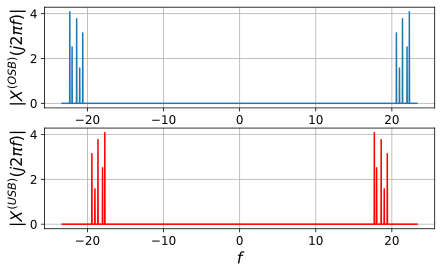

In [5]:
# Spektrum der modulierten Einseitenbandsignale
f_0int = f_0*N_f
N_margin = 50

XOSB = np.append(np.zeros((1,f_0int-f_max)), UOSB) / 2.0
XOSB = np.append(np.flipud(XOSB),XOSB)
XOSBplot = np.append(np.zeros((1,N_margin)), XOSB)
XOSBplot = np.append(XOSBplot, np.zeros((1,N_margin)))

XUSB = np.append(np.zeros((1,f_0int-f_max)), UUSB) / 2.0
XUSB = np.append(np.flipud(XUSB),XUSB)
XUSBplot = np.append(np.zeros((1,N_margin)), XUSB)
XUSBplot = np.append(XUSBplot, np.zeros((1,N_margin)))


fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(np.arange(-f_0int-f_max-N_margin-1,f_0int+f_max+N_margin+1)/N_f,abs(XOSBplot))
#plt.xlabel('$f$')
plt.ylabel('$|X^{(OSB)}(j 2 \pi f)$|')
plt.grid(True)

ax = fig.add_subplot(212)
ax.plot(np.arange(-f_0int-f_max-N_margin-1,f_0int+f_max+N_margin+1)/N_f,abs(XUSBplot),'r-')
plt.xlabel('$f$')
plt.ylabel('$|X^{(USB)}(j 2 \pi f)$|')
plt.grid(True)